In [1]:
import numpy as np

from optimize import speedgrad, RLnetwork

%matplotlib inline

## Let a system be in a form
## $\dot{x} = f(x)+g(x)u$ 

### the Hamiltonian equations give:
#### $\dot{I} = -\nabla_{\theta}H$
#### $\dot{\theta} = \nabla_{I}H$


In [2]:
from models import Model1

### $H= I_1 w_1+I_2 w_2+\dfrac{1}{30}\left[I_1^3+\dfrac{1}{2}I_2^3\right]+\varepsilon\cos(\theta_2-\theta_1)=H_0(I)+\varepsilon V(\theta)$

### no control

In [3]:
init_state=np.array([6, 4, 0, 0])
m = Model1(init_state)

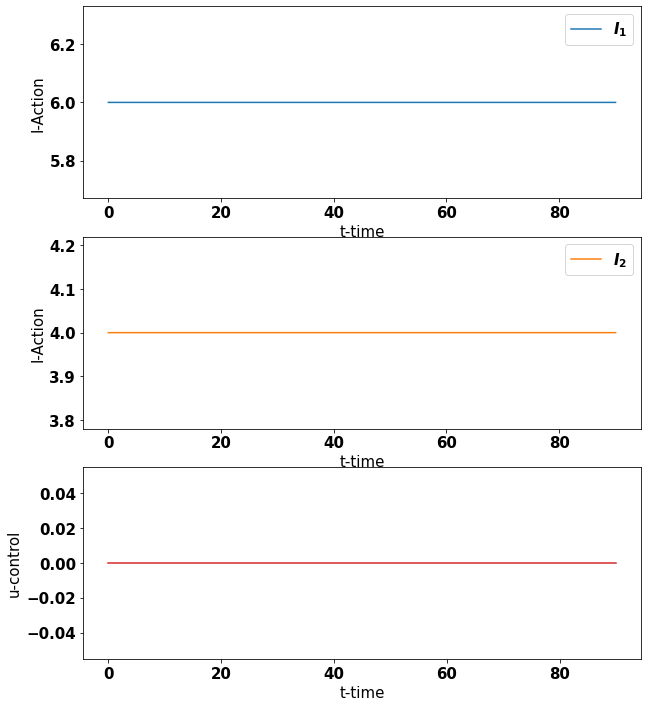

In [4]:
for i in range(900):
    m.update(0)
m.plot_evolution()

## no optimization

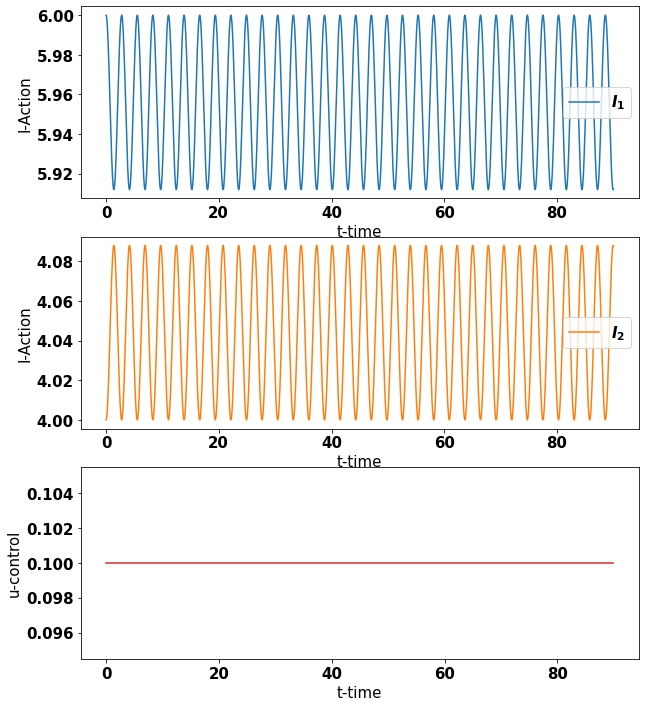

In [5]:
m = Model1(init_state)
for i in range(900):
    m.update(0.1)
m.plot_evolution()

## speed-gradient

current state: [   6.12549761    3.87450239 1357.48467645 1560.65807527]


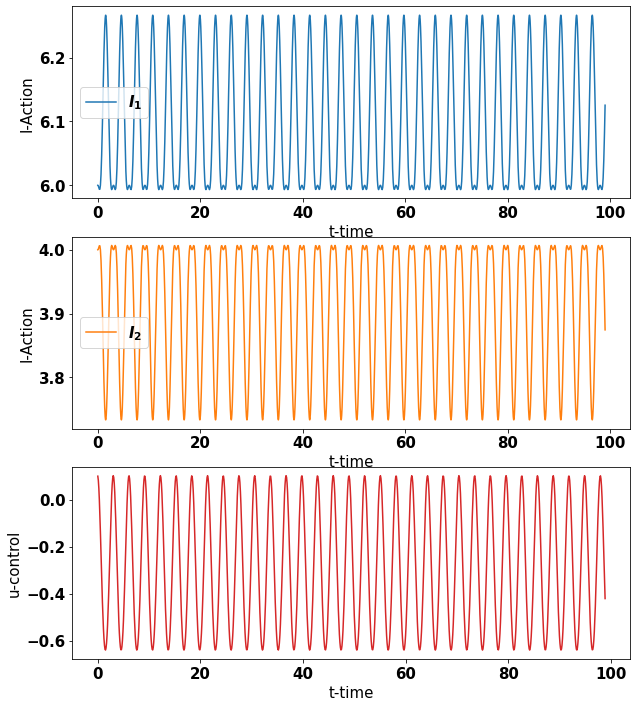

In [6]:
m1 = Model1(init_state)
u = 0.1

for i in range(990):
    m1.update(u)
    u = speedgrad(m1.state, u, 8, 0.4)
    
print('current state:', m1.state)
m1.plot_evolution()

## RL-network

current state: [   8.02666603    1.97333397 1641.80475124 1502.93061231]
V(x0) = 62.45525858285499


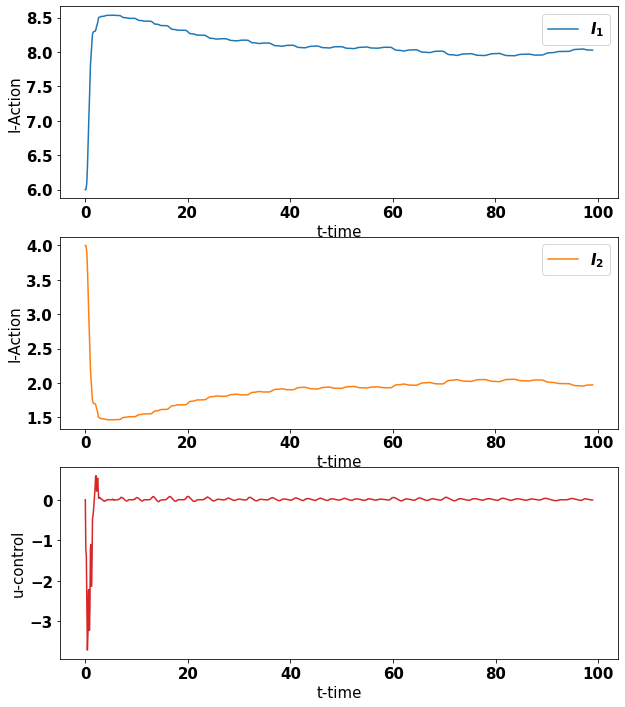

In [27]:
m2 = Model1(init_state)
net = RLnetwork(m2.f, m2.g, 8, N=10)
u = net.u(m2.state)

for i in range(990):
    m2.update(u)
    u = net.optimize(m2.state)

print('current state:', m2.state)
print('V(x0) =', net.V(init_state))

m2.plot_evolution()

In [28]:
np.round(net.Wc, 2), np.round(net.Wa, 2)

(array([ 0.98,  1.21,  0.6 ,  0.  ,  0.  , -0.  , -0.  ,  0.6 ,  0.58]),
 array([ 0.97,  1.2 ,  0.6 ,  0.  ,  0.  , -0.  , -0.  ,  0.59,  0.57]))

In [29]:
net.print_V(2)

+0.98x_1^2+1.21x_1 x_2+0.6x_2^2+0.0sin(x_3)+0.0sin(x_4)-0.0cos(x_3)-0.0cos(x_4)+0.6sin(x_4-x_3)+0.58cos(x_4-x_3)


In [30]:
net.print_u(2)

1/2*[(0.74)x_1+(0.0)x_2]sin(x_4-x_3)


## test of trained network

current state: [   7.99618153    2.00381847 1609.67473943 1507.1422661 ]
V(x0) = 62.45525858285499


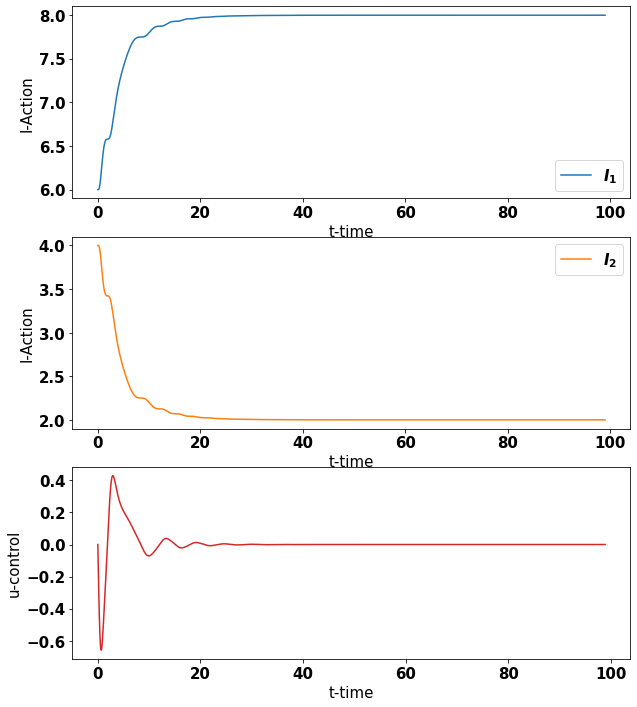

In [31]:
m3 = Model1(init_state)
for i in range(990):
    u = net.u(m3.state)
    m3.update(u)

print('current state:', m3.state)
print('V(x0) =', net.V(init_state))

m3.plot_evolution()

## second train

In [32]:
from copy import deepcopy

current state: [   8.03737161    1.96262839 1647.0482219  1503.01237324]
V(x0) = 62.008925102367684


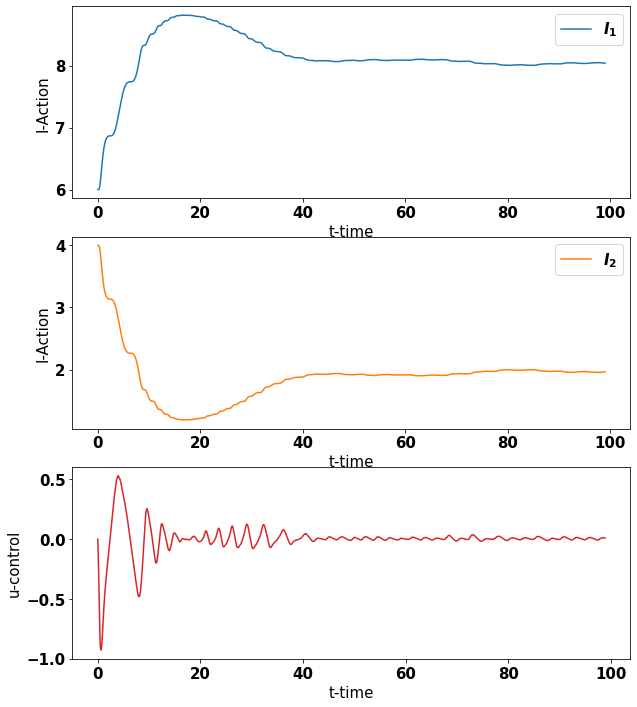

In [36]:
net2 = deepcopy(net)
m4 = Model1(init_state)

u = net2.u(m4.state)

for i in range(990):
    m4.update(u)
    u = net2.optimize(m4.state)

print('current state:', m4.state)
print('V(x0) =', net2.V(init_state))

m4.plot_evolution()

## test of second train application

current state: [   8.00183339    1.99816661 1610.86596521 1506.97428228]
V(x0) = 62.008925102367684


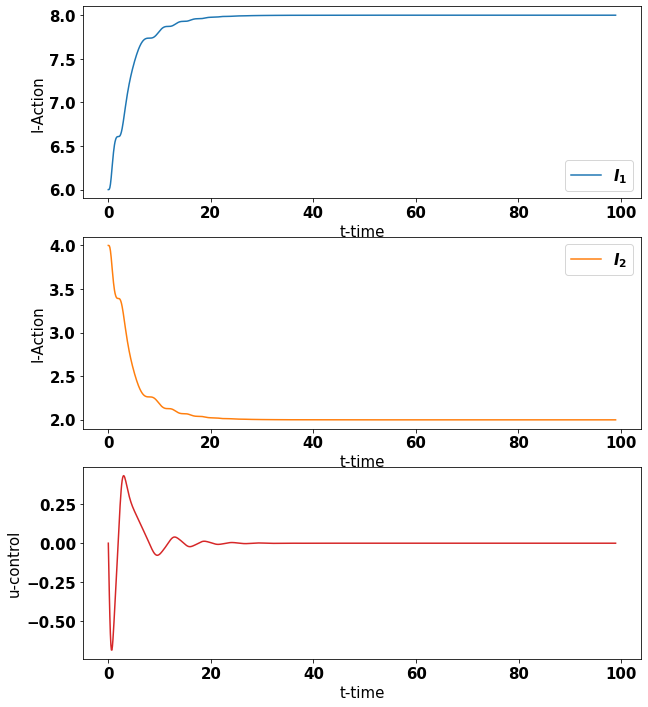

In [37]:
m5 = Model1(init_state)
for i in range(990):
    u = net2.u(m5.state)
    m5.update(u)

print('current state:', m5.state)
print('V(x0) =', net2.V(init_state))

m5.plot_evolution()

In [38]:
np.round(net2.Wc, 2), np.round(net2.Wa, 2)

(array([ 0.99,  1.2 ,  0.6 ,  0.  , -0.  ,  0.  , -0.  ,  0.3 ,  0.3 ]),
 array([ 0.98,  1.19,  0.6 ,  0.  , -0.  ,  0.  , -0.  ,  0.3 ,  0.29]))